In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [8]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [9]:
X = titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = titanic['Survived']

In [10]:
X = pd.get_dummies(X, dtype=int)
X = X.fillna({'Age': X['Age'].median()})

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4)

In [13]:
accuracy_cv = cross_val_score(clf, X_train, y_train, cv=5)
accuracy_cv

array([0.76666667, 0.82352941, 0.78991597, 0.75630252, 0.80672269])

средняя точность кросс-валидации

In [14]:
accuracy_cv.mean()

0.7886274509803922

In [15]:
max_depth_values = range(1, 100)

In [16]:
scores_data = pd.DataFrame()

In [17]:
for max_depth in max_depth_values:
    clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)

    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv=5).mean()

    temp_score_data = pd.DataFrame({'max_depth': [max_depth],
                                    'train_score': [train_score],
                                    'test_score': [test_score],
                                    'cross_val_score': [mean_cross_val_score]})

    scores_data = pd.concat([scores_data, temp_score_data])

In [18]:
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073
...,...,...,...,...
0,95,0.979866,0.772881,0.763459
0,96,0.979866,0.772881,0.770182
0,97,0.979866,0.769492,0.770196
0,98,0.979866,0.776271,0.766821


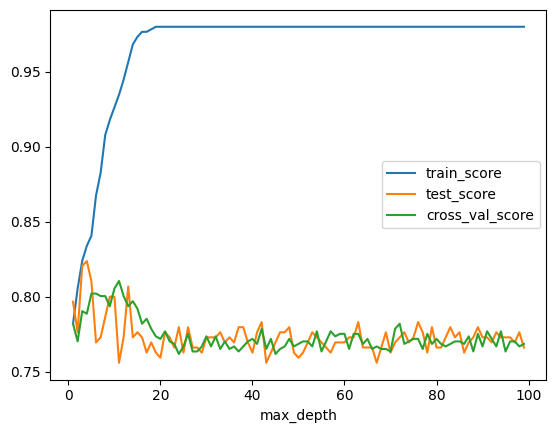

In [19]:
scores_data.plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score']);

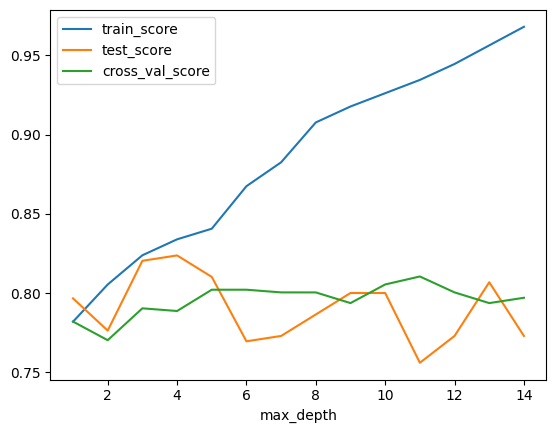

In [20]:
scores_data[scores_data['max_depth'] < 15].plot(x='max_depth', y=['train_score', 'test_score', 'cross_val_score']);

Лучший результат модель показывает на глубине 10 и 11

In [21]:
scores_data.head(20)

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.810169,0.802073
0,6,0.867450,0.769492,0.802073
0,7,0.882550,0.772881,0.800378
0,8,0.907718,0.786441,0.800364
0,9,0.917785,0.800000,0.793627
0,10,0.926174,0.800000,0.805392


In [22]:
scores_data.sort_values('cross_val_score', ascending=False).head(1)

,max_depth,train_score,test_score,cross_val_score
0,11,0.934564,0.755932,0.810434


In [23]:
max_depth = scores_data.sort_values('cross_val_score', ascending=False).head(1)['max_depth'].values[0]
max_depth

11

In [24]:
best_clf = DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)

In [25]:
best_clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=11)

In [26]:
best_clf.score(X_test, y_test)

0.7728813559322034

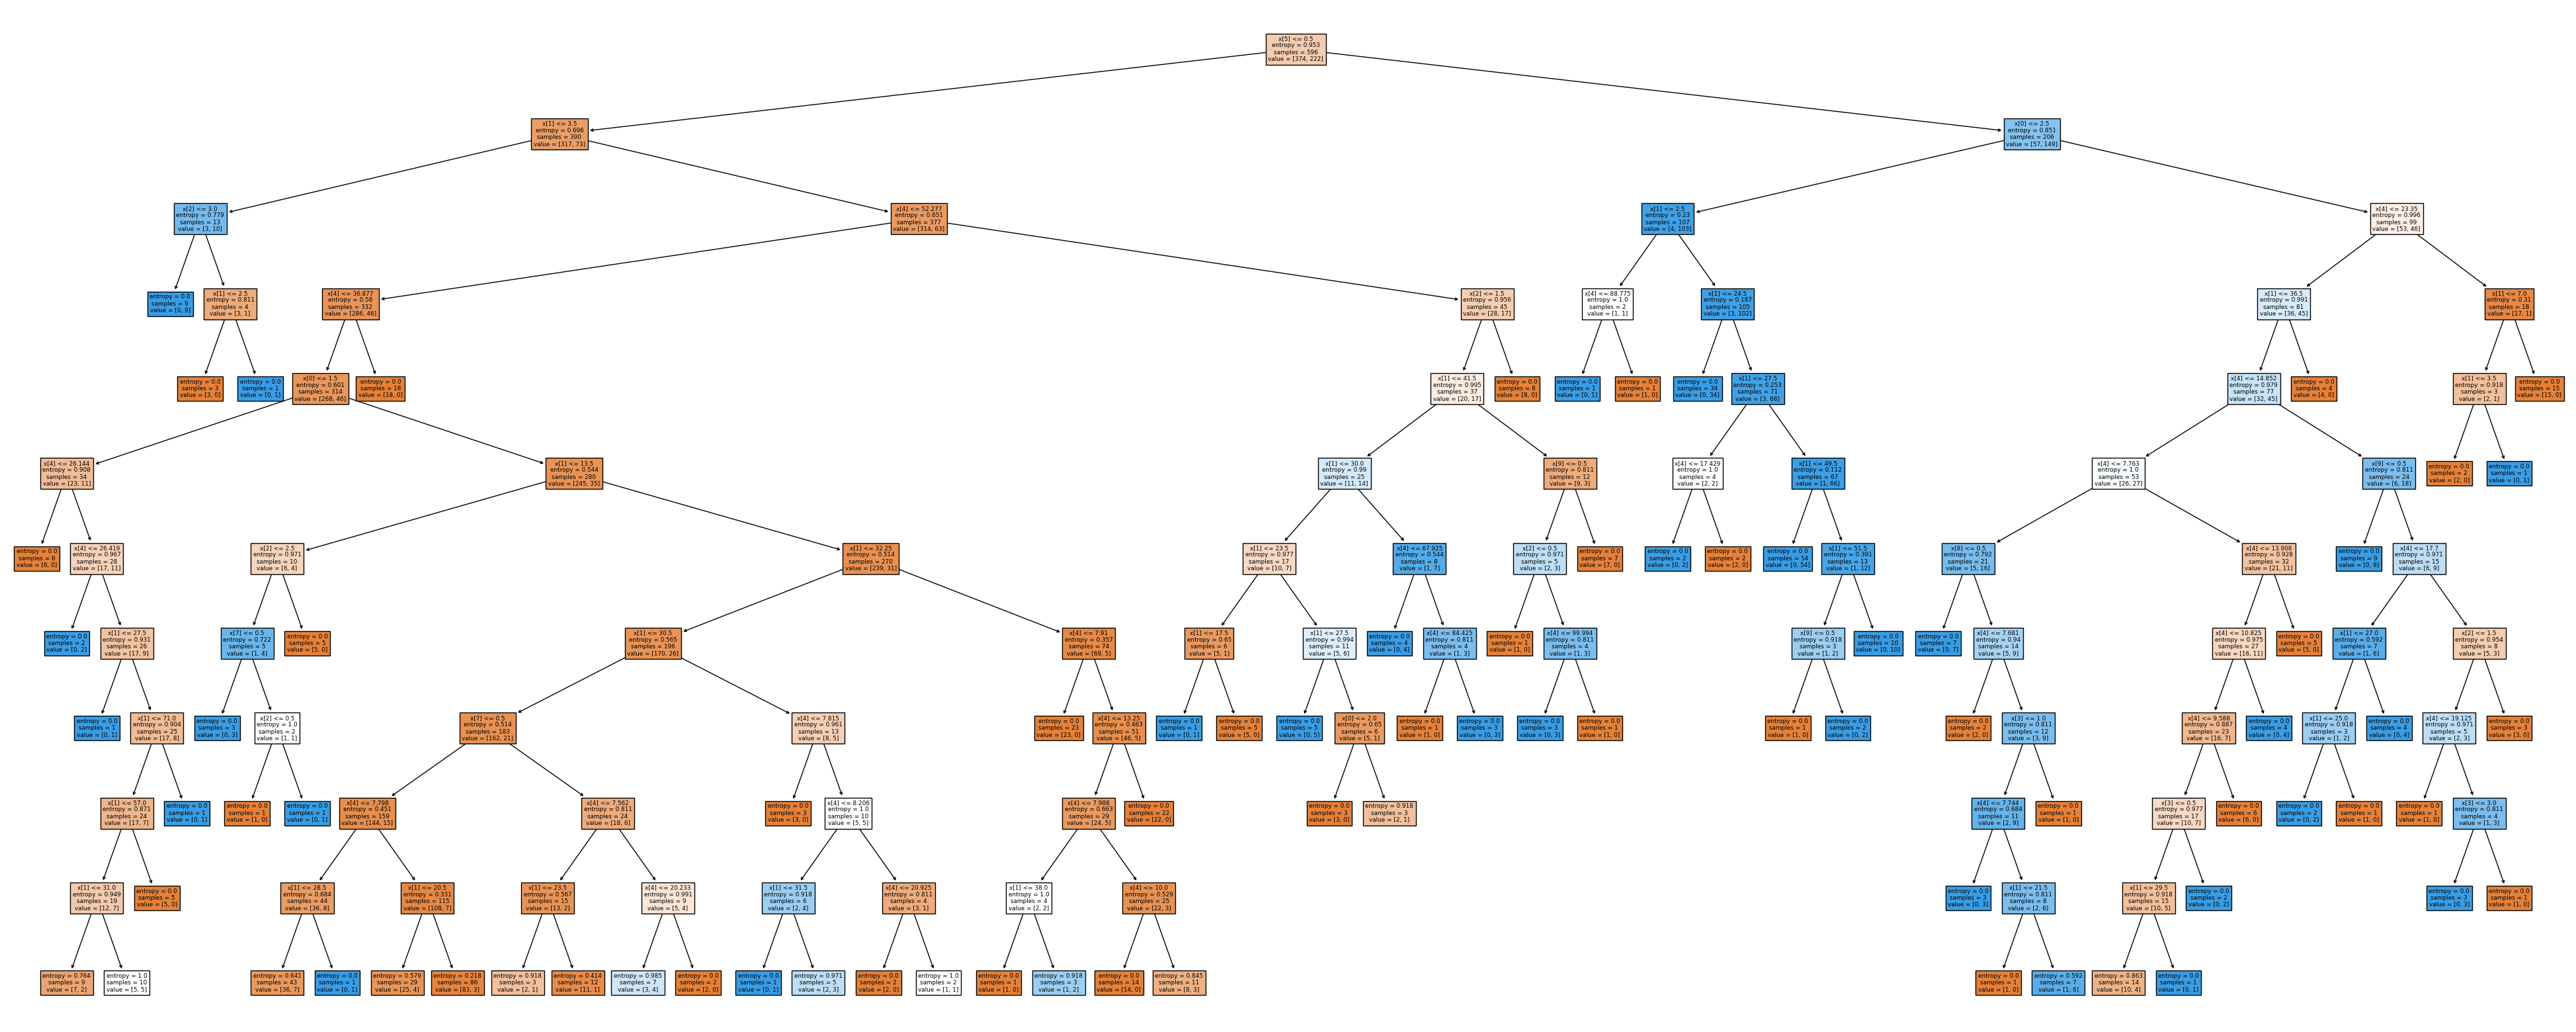

In [27]:
plt.figure(figsize=(50, 20))
plot_tree(best_clf, filled=True);

Добавлено из степа 2.6.2 

In [28]:
from sklearn.model_selection import GridSearchCV

In [38]:
clf = DecisionTreeClassifier()
clf

DecisionTreeClassifier()

In [39]:
parametrs = {'criterion': ['gini', 'entropy'], 'max_depth': range(1, 30)}

In [40]:
grid_search_cv_clf = GridSearchCV(clf, parametrs, cv=5)

In [50]:
grid_search_cv_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 30)})

In [51]:
grid_search_cv_clf.best_params_

{'criterion': 'entropy', 'max_depth': 10}

In [52]:
best_clf_2 = grid_search_cv_clf.best_estimator_

In [53]:
best_clf_2.score(X_test, y_test)

0.8033898305084746

In [61]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [55]:
y_pred = best_clf_2.predict(X_test)

In [56]:
precision_score(y_test, y_pred)

0.8297872340425532

In [58]:
recall_score(y_test, y_pred)

0.65

In [62]:
f1_score(y_test, y_pred)

0.7289719626168223